<a href="https://www.kaggle.com/code/sagarkanade721/project-logisticregression-mushroomclassprediction?scriptVersionId=100330475" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#Lets check some insights of each features

In [8]:
class feature_details:
    
    
    def categorical_feature_details(self,categorical_df):
        
        print("\n==================================================================")
        print("                   CATEGORICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=categorical_df.columns
    
        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________")



            #nulls
            
            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=(nulls/(len(df[col])))*100
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))

            uniqs=df[col].unique()
            print("\n    Unique values are:")
            for i in range(len(uniqs)):
                print('    ',i+1,'-',uniqs[i])
                
                
                
                
    def categorywise_outliers_details(self,categorical_df,target_column):
        
        df=pd.concat([categorical_df,target_column],axis=1)
        targetcol=target_column.name
        cols=df.columns
        
        
        print("\n=====================================================================")
        print("\n                   CATEGORYWISE OUTLIERS DETAILS:                    ")
        print("               (with respect to target variable: {} )               \n".format(targetcol))

        print("=====================================================================")
        
        
        for i in range(len(cols)):

            col=cols[i]

            if col==targetcol:
                continue
            else:
                print("\n\n________________")
                print("\nCOLUMN: {} ".format(col.upper()))
                print("________________")
                cats=df[col].unique()
            
            for i in range(len(cats)):
                cat=cats[i]

                print("\n\n      {}. Category: {} \n".format(i+1,cat))



                q75,q25=np.percentile(df[df[col]==cat][targetcol],[75,25])
                iqr=np.round(q75-q25,3)
                upperlim=np.round(q75+(1.5*iqr),3)
                lowerlim=np.round(q25-(1.5*iqr),3)



                upper_indexes=df[(df[col]==cat) & (df[targetcol]>upperlim)].index
                lower_indexes=df[(df[col]==cat) & (df[targetcol]<lowerlim)].index

                mini=df[df[col]==cat][targetcol].min()
                maxi=df[df[col]==cat][targetcol].max()
                avg=np.round(df[df[col]==cat][targetcol].mean(),2)
                print("                Minimum {} for {} is: {}".format(targetcol,cat,mini))
                print("                Maximum {} for {} is: {}".format(targetcol,cat,maxi))
                print("                Average {} for {} is: {}\n".format(targetcol,cat,avg))
                
                print("                Upper Limit is {}".format(upperlim))
                print("                Lower Limit is {}".format(lowerlim))
                
                
                
                if (len(upper_indexes)>0) or (len(lower_indexes)>0):

                    if len(upper_indexes)>0:
                        print("\n                  >>> HIGHER OUTLIERS: {} ".format(len(upper_indexes)))
                        print("                \nOutliers are at index nos: \n",list(upper_indexes))
                        

                    if len(lower_indexes)>0:
                        print("                  >>> LOWER OUTLIERS: {} \n".format(len(lower_indexes)))
                        print("                \nOutliers are at index nos: \n",list(lower_indexes))
                        

                else:
                    print("                  NO OUTLIERS")
                    
                    
                
            
                

                
                
    def numerical_feature_details(self,numerical_df):
        print("\n==================================================================")
        print("                   NUMERICAL FEATURE DETAILS                     ")
        print("==================================================================")
        
        cols=numerical_df.columns

        for col in cols:
            print("\n\n________________")
            print("\nFeature: {}".format(col))
            print("________________\n")


            
            mins=df[col].min()
            maxs=df[col].max()
            avgs=np.round(df[col].mean(),2)
            
            print("Minimum {} is {}".format(col,mins))
            print("Maximum {} is {}".format(col,maxs))
            print("Average {} is {}".format(col,avgs))
            
            
            
            
            #nulls

            print('\n\nNULLS:-\n')
            nulls=df[col].isnull().sum()
            pernulls=(nulls/(len(df[col])))*100
            print("    {} % Null values \n    (i.e Out of {} instaces, there are {} Number of null values)".format(pernulls,len(df[col]),nulls))



            #uniques

            print('\nUNIQUES:-\n')
            nuniqs=df[col].nunique()
            print("    Total {} unique values".format(nuniqs))



            #outliers
            
            print('\nOUTLIERS:-\n')


            q75,q25=np.percentile(df[col],[75,25])
            iqr=np.round(q75-q25,3)
            upperlim=np.round(q75+(1.5*iqr),3)
            lowerlim=np.round(q25-(1.5*iqr),3)
            
            print("    25th Percentile is: ",q25)
            print("    75th Percentile is: ",q75)

            print("    Inter Quartile range is: ",iqr)

            print("    Upper limit is: ", upperlim)
            print("    Lower limit is: ", lowerlim)
                        
            print('\n')    
            print("    >>> HIGHER OUTLIERS: {} ".format(len(df[df[col]>upperlim])))
            print("    >>> LOWER OUTLIERS: {} ".format(len(df[df[col]<lowerlim])))
            print('\n\n')


            
            

       

In [9]:
feature_details=feature_details()

In [10]:
feature_details.categorical_feature_details(df)


                   CATEGORICAL FEATURE DETAILS                     


________________

Feature: class
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 8124 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 2 unique values

    Unique values are:
     1 - p
     2 - e


________________

Feature: cap-shape
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 8124 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 6 unique values

    Unique values are:
     1 - x
     2 - b
     3 - s
     4 - f
     5 - k
     6 - c


________________

Feature: cap-surface
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 8124 instaces, there are 0 Number of null values)

UNIQUES:-

    Total 4 unique values

    Unique values are:
     1 - s
     2 - y
     3 - f
     4 - g


________________

Feature: cap-color
________________


NULLS:-

    0.0 % Null values 
    (i.e Out of 8124 instaces, there are 0 Number of null

In [11]:
#looks like in 'stalk-root' feature there are some missing values, lets check them

df[df['stalk-root']=='?']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,e,?,s,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,e,?,s,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,t,?,k,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,t,?,s,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [12]:
(len(df[df['stalk-root']=='?'])/len(df))*100

30.526834071885773

In [13]:
#out of 8124, there are 2480 values are missing, i.e about 30.52% information of stalk-root is missing, 
#lets check how many of them (missing ones) are poisonous or edible

[Text(0, 0, '720'), Text(0, 0, '1760')]

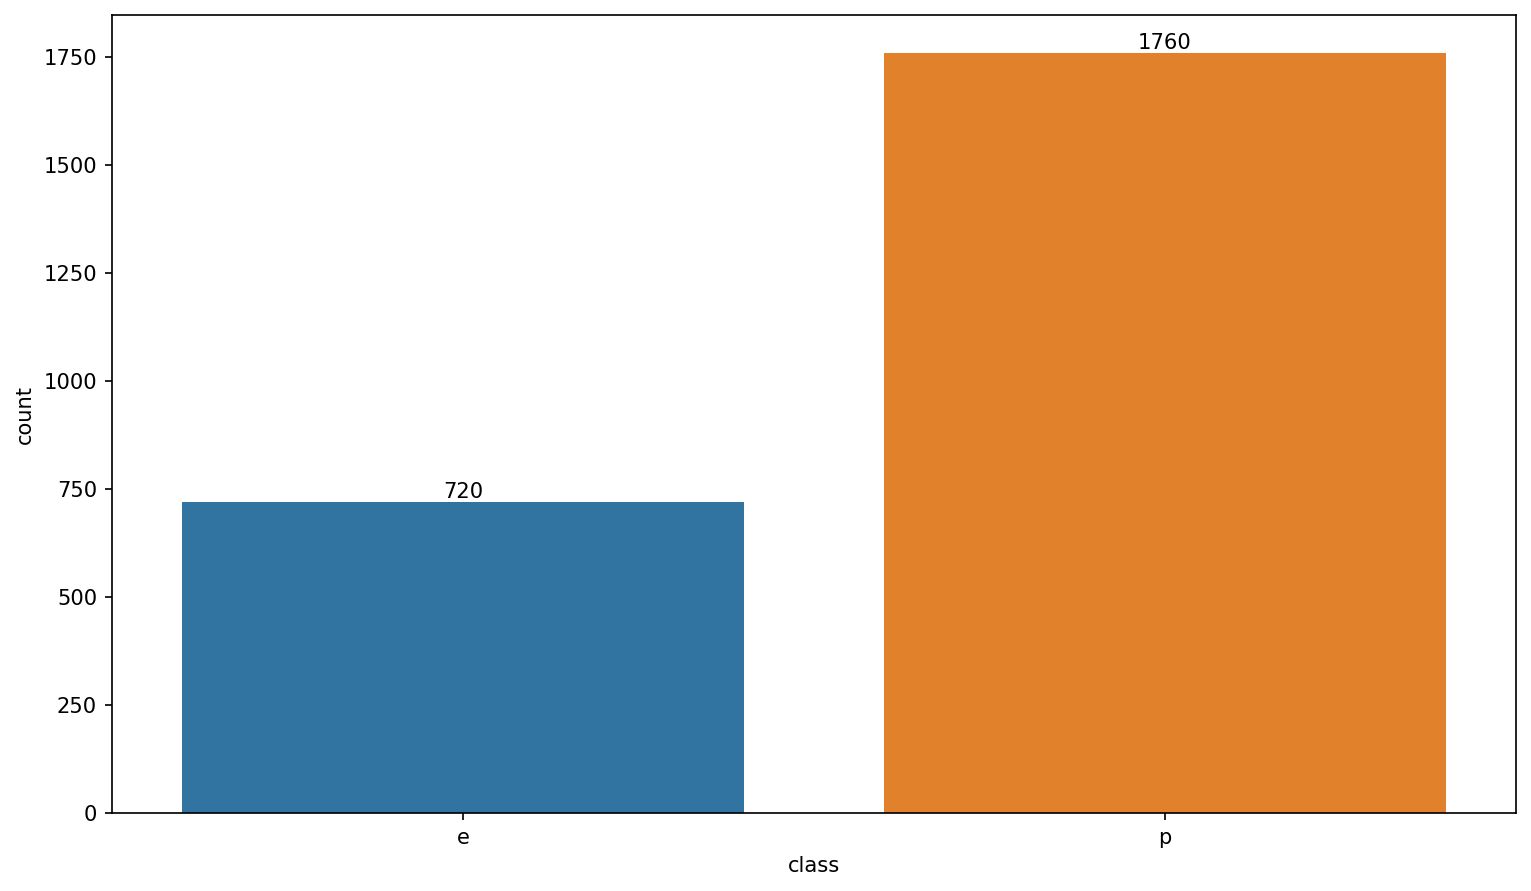

In [14]:
plt.figure(figsize=(12,7),dpi=151)
ax=sns.countplot(data=df[df['stalk-root']=='?'],x='class')
ax.bar_label(ax.containers[0])

In [15]:
#out of 2480 of missing values, 1760 belongs to poisonous class and 720 belongs to edible class

In [16]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

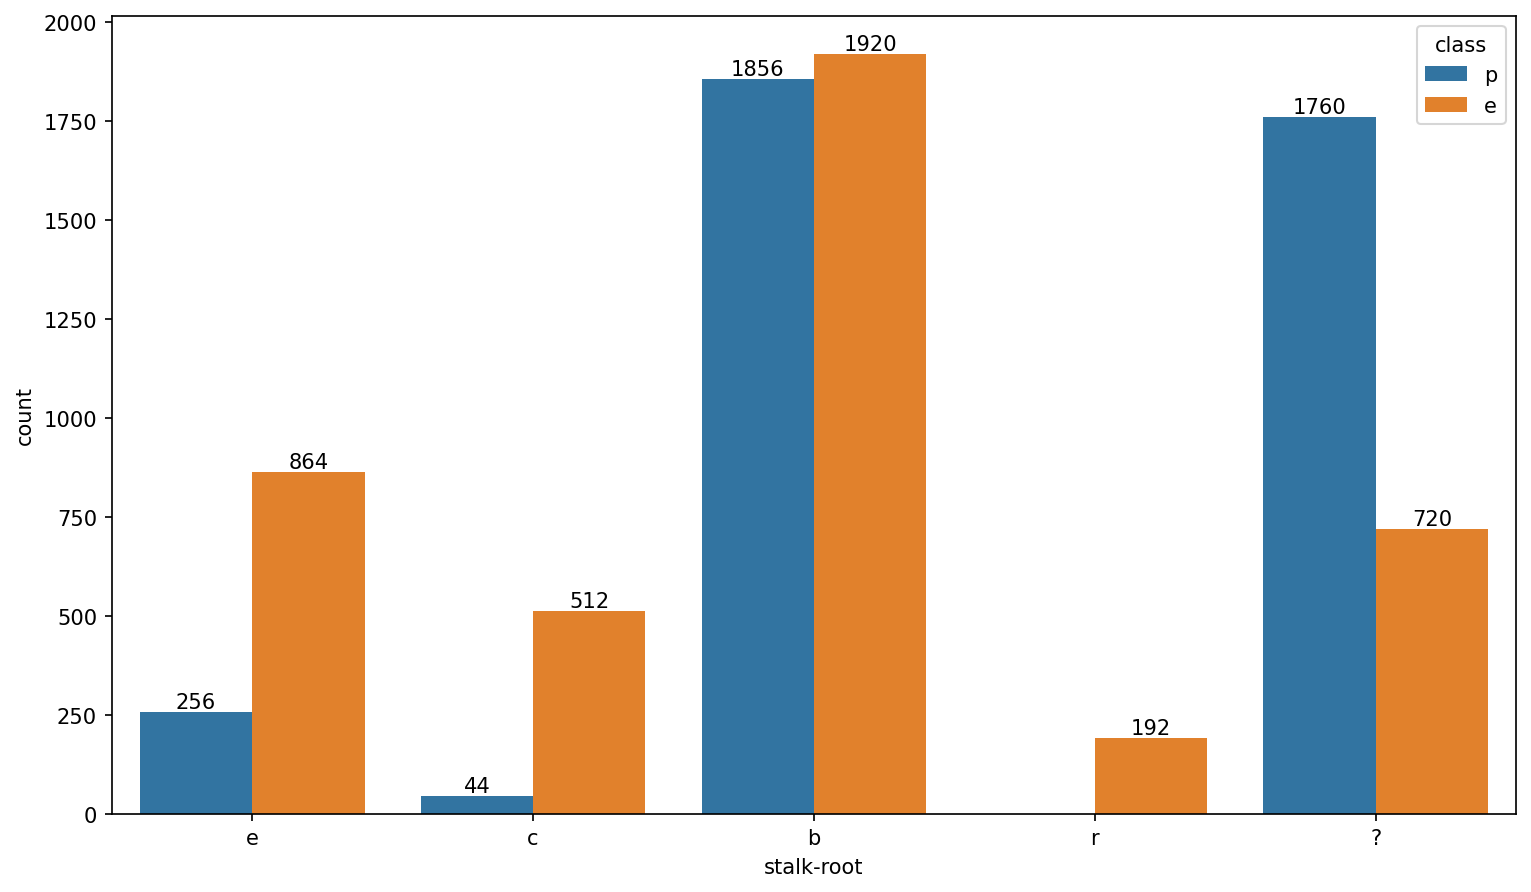

In [17]:
plt.figure(figsize=(12,7),dpi=151)
ax=sns.countplot(data=df,x='stalk-root',hue='class')
for i in ax.containers:
    ax.bar_label(i,)

#### Observation: 

    1. 2480 rows (i.e 30% data) in stalk-root feature are missing
    2. out of them 1760 (71% of data) belongs to poisonous class
    3. Highest occurance of stalk-root values is 'b'
    4. out of 8124, 3776 (46%) values are of 'b', 
    5. out of 3776 of 'b's, there are 1856 'poisonous' and 1920 'edible'


**I will be creating 2 models, 1 with filling missing values with mode (i.e 'b'), and 2nd with keeping missing values as it is.**


----------------------
## Model-1 : (filling missing values with mode (i.e with 'b'))

In [18]:
#filling missing values with 'b'
df['stalk-root']=df['stalk-root'].replace('?',df['stalk-root'].mode()[0])

In [19]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [20]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

In [21]:
#Onehot encoding

In [22]:
#removing target variable before onehot encoding
df1=df.drop('class',axis=1) #dataframe without target variable

In [23]:
#dataframe with dummies
df2=pd.get_dummies(df1,drop_first=True)

In [24]:
df2.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
#Lets create model:
X=df2 #Independent variables

In [26]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
y=df['class'] #Dependent variable (Target Variable)

In [28]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#Creaing instance of model by keeping default hyperparameters
log_model=LogisticRegression()

In [33]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=log_model.predict(X_test)

In [35]:
y_pred

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [36]:
log_model.coef_

array([[ 7.09841512e-01, -1.12527293e-01, -2.10991555e-01,
        -6.16957944e-01, -2.30872723e-01,  1.08988200e+00,
         5.70487668e-01,  4.56102141e-01, -9.34105614e-01,
         6.73677918e-02, -6.51406623e-02, -5.53314588e-01,
         7.13994546e-01, -6.08788418e-01, -5.17047154e-01,
         9.80727308e-02, -6.73227705e-01,  4.63076743e-02,
         4.23944707e+00,  3.57806098e+00, -1.58993390e+00,
         3.82260268e-01, -4.01458642e+00,  2.78666001e+00,
         1.18268314e+00,  1.15660060e+00,  5.31167631e-01,
        -2.36025669e+00,  3.28242164e+00, -6.53811438e-01,
        -1.37388228e-01,  4.74358488e-02, -5.78517203e-01,
        -7.75743211e-01, -2.57506988e-01, -5.65775397e-01,
         8.76138610e-01, -1.78587555e-01, -2.89926000e-01,
         7.08122086e-02, -8.33008162e-01, -2.01250741e+00,
         3.34823607e-01, -1.68611077e+00,  1.42072298e+00,
        -8.19617394e-01,  3.88100605e-01,  5.33944420e-01,
         2.21887939e-01,  1.17495917e+00,  3.82260268e-0

In [37]:
#Performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,recall_score,precision_score

In [38]:
accuracy_score(y_test,y_pred)

0.9993846153846154

In [39]:
confusion_matrix(y_test,y_pred)

array([[851,   0],
       [  1, 773]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


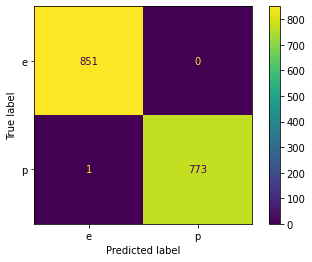

In [40]:
plot_confusion_matrix(log_model,X_test,y_test)

In [41]:
# there is one instance which was Actual 'Poisonous' and our model predicted as 'Edible', 
#we need to create better model by adjusting hyper parameters

In [42]:
#lets check classification report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [43]:
#classwise accuracy,precision,recall and f1-score shows 100%

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


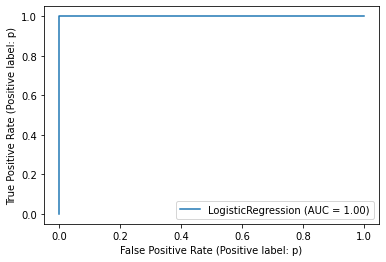

In [44]:
#lets plot ROC curve:
plot_roc_curve(log_model,X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


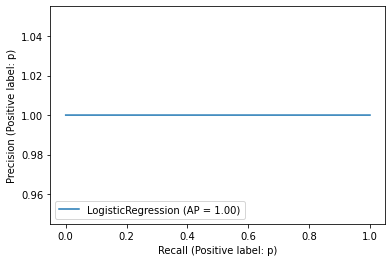

In [45]:
#Lets plot precision recall curve:
plot_precision_recall_curve(log_model,X_test,y_test)

----------------------
## Model-2 : (keeping missing values as it is)

In [46]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [47]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [48]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [49]:
#removing target variable before onehot encoding
df1=df.drop('class',axis=1) #dataframe without target variable

In [50]:
#dataframe with dummies
df2=pd.get_dummies(df1,drop_first=True)

In [51]:
df2.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
#Lets create model
X=df2 #Independent variables

In [53]:
y=df['class'] #Dependent (Target Variable)

In [54]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#Creaing instance of model by keeping default hyperparameters
log_model=LogisticRegression()

In [58]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_pred=log_model.predict(X_test)

In [60]:
y_pred

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [61]:
log_model.coef_

array([[ 0.63401707, -0.18910296, -0.18962319, -0.58184076, -0.29046287,
         0.9895893 ,  0.64868919,  0.51993191, -1.09383675,  0.14419166,
        -0.08622761, -0.44168572,  0.60639798, -0.51043855, -0.42655471,
         0.14489412, -0.54278638, -0.48803241,  3.49249943,  3.03351848,
        -1.51950093,  0.25694921, -4.05317114,  3.03498075,  1.34983061,
         1.32532894,  0.37300214, -2.97210237,  3.31293499, -0.58895103,
        -0.17537183, -0.03085872, -0.51941662, -0.83642535, -0.18233427,
        -0.66236365,  0.75396682, -0.29927182, -0.46982685,  0.09057468,
        -1.05716027,  2.28980777, -1.51067432,  0.85238194, -1.39033941,
         1.84799135, -0.72335874,  0.27168125,  0.61242382,  0.05891749,
         1.4734033 ,  0.25694921, -0.52025591, -0.33952333, -0.24182513,
        -0.50687575,  0.44219125, -0.11907052,  0.78968875,  0.25694921,
        -0.45213675, -0.29246931, -1.10782522, -0.50687575,  0.5946569 ,
         0.31296047,  1.05859019, -0.22329219, -0.2

In [62]:
#Performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,recall_score,precision_score

In [63]:
accuracy_score(y_test,y_pred)

1.0

In [64]:
confusion_matrix(y_test,y_pred)

array([[851,   0],
       [  0, 774]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


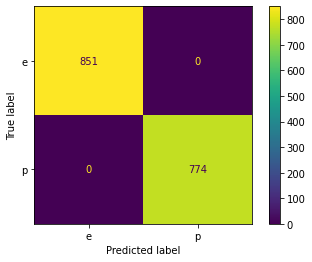

In [65]:
plot_confusion_matrix(log_model,X_test,y_test)

In [66]:
#There are no False Predictions

In [67]:
#lets check classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [68]:
#classwise accuracy,precision,recall and f1-score shows 100%

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


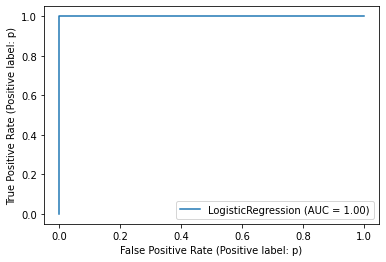

In [69]:
#lets plot ROC curve:
plot_roc_curve(log_model,X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


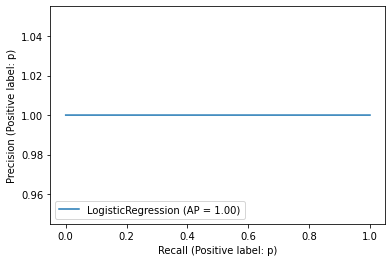

In [70]:
plot_precision_recall_curve(log_model,X_test,y_test)

-------------------------
#### Lets create model by Cross Validating different hyperparameters with 'GridSearchCV'

## Model-1(a) : (filling missing values at 'stalk-root' feature with 'b' (i.e mode))

In [71]:
df=pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [72]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [73]:
df['stalk-root']=df['stalk-root'].replace('?',df['stalk-root'].mode()[0])

In [74]:
#removing target variable before onehot encoding

df1=df.drop('class',axis=1)#dataframe without target variable

In [75]:
df2=pd.get_dummies(df1,drop_first=True) #dataframe with dummies

In [76]:
X=df2 #Independent variables

In [77]:
y=df['class'] #Dependent variable(Target variable)

In [78]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [79]:
#Creating base model
log_model=LogisticRegression(solver='saga', max_iter=5000,multi_class='ovr')

In [80]:
#Lets find best hyperparameters using Cross_validation
from sklearn.model_selection import GridSearchCV

In [81]:
#Lets create dictionary to check various range of parameters
param_grid={'penalty':['elasticnet'],'C':np.logspace(0,10,5), 'l1_ratio':np.linspace(0,1,5)}

In [82]:
#Creating model
grid_model=GridSearchCV(log_model,param_grid=param_grid,cv=5)

In [83]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['elasticnet']})

In [84]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=1.0, max_iter=5000, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

In [85]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 1.0, 'penalty': 'elasticnet'}

In [86]:
y_pred=grid_model.predict(X_test)

In [87]:
y_pred

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [88]:
grid_model.predict_log_proba(X_test)

array([[-8.38797119e+00, -2.27614447e-04],
       [-2.37054513e-05, -1.06498174e+01],
       [-8.43538228e+00, -2.17073675e-04],
       ...,
       [-2.74919875e-05, -1.05016297e+01],
       [-9.40537159e-07, -1.38768151e+01],
       [-1.99266676e+01, -2.21798313e-09]])

In [89]:
#performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [90]:
accuracy_score(y_test,y_pred)

1.0

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [92]:
confusion_matrix(y_test,y_pred)

array([[851,   0],
       [  0, 774]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


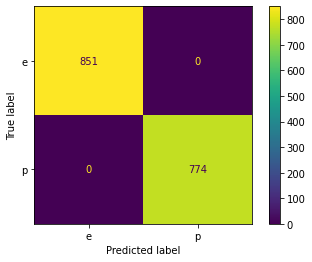

In [93]:
plot_confusion_matrix(grid_model,X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


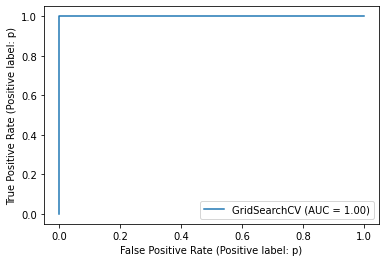

In [94]:
plot_roc_curve(grid_model,X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


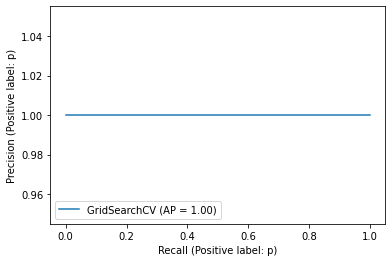

In [95]:
plot_precision_recall_curve(grid_model,X_test,y_test)

-------------------------
#### Lets create model by Cross Validating different hyperparameters with 'GridSearchCV'

## Model-2(a) : (keeping missing values as it is)

In [96]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [97]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [98]:
df['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

In [99]:
#removing target variable before onehot encoding
df1=df.drop('class',axis=1) #dataframe without target variable

In [100]:
#dataframe with dummies
df2=pd.get_dummies(df1,drop_first=True)

In [101]:
df2.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [102]:
#Lets create model
X=df2 #Independent variables

In [103]:
y=df['class'] #Dependent (Target Variable)

In [104]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
log_model=LogisticRegression(solver='saga', max_iter=5000,multi_class='ovr')

In [108]:
#Lets find best hyperparameters using Cross_validation
from sklearn.model_selection import GridSearchCV

In [109]:
#Lets create dictionary to check various range of parameters
param_grid={'penalty':['elasticnet'],'C':np.logspace(0,10,5), 'l1_ratio':np.linspace(0,1,5)}

In [110]:
#Creating model
grid_model=GridSearchCV(log_model,param_grid=param_grid,cv=5)

In [111]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10]),
                         'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'penalty': ['elasticnet']})

In [112]:
grid_model.best_estimator_

LogisticRegression(l1_ratio=1.0, max_iter=5000, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

In [113]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 1.0, 'penalty': 'elasticnet'}

In [114]:
y_pred=grid_model.predict(X_test)

In [115]:
y_pred

array(['p', 'e', 'p', ..., 'e', 'e', 'p'], dtype=object)

In [116]:
grid_model.predict_log_proba(X_test)

array([[-8.38734566e+00, -2.27756886e-04],
       [-2.37012921e-05, -1.06499928e+01],
       [-8.43537410e+00, -2.17075452e-04],
       ...,
       [-2.74939260e-05, -1.05015592e+01],
       [-9.41341618e-07, -1.38759602e+01],
       [-1.99233594e+01, -2.22533281e-09]])

In [117]:
#performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve

In [118]:
accuracy_score(y_test,y_pred)

1.0

In [119]:
#Accuracy is 100%

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [121]:
#classwise accuracy precision score,recall score, and f1-score is 100%

In [122]:
confusion_matrix(y_test,y_pred)

array([[851,   0],
       [  0, 774]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


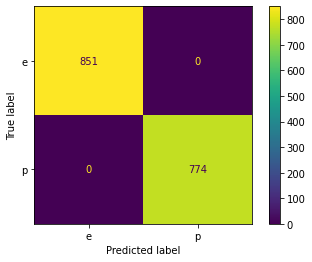

In [123]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [124]:
#There is no single misprediction

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


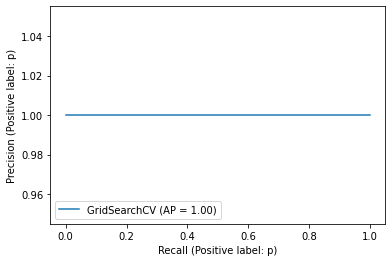

In [125]:
#lets plot precision_recall_curve
plot_precision_recall_curve(grid_model,X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


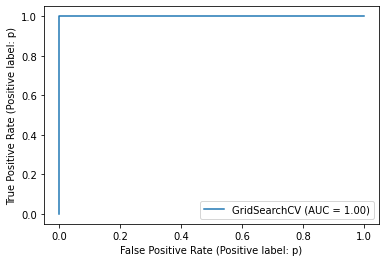

In [126]:
#Lets plot ROC curve
plot_roc_curve(grid_model,X_test,y_test)